In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [155]:
bank = pd.read_csv('bank/bank.csv', sep=';')

In [156]:
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [157]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [158]:
bank = pd.read_csv('bank/bank.csv', sep=';')

In [159]:
bank.head(2)

age         job  marital  education default  balance housing loan  \
0   30  unemployed  married    primary      no     1787      no   no   
1   33    services  married  secondary      no     4789     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no

In [162]:
X = bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y = np.where(bank.y == 'yes', 1, 0)

In [163]:
X.corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

In [140]:
X_train.head(2)

age  balance  day  duration  campaign  pdays  previous
1412   57     4012   20       915         1     -1         0
2117   40     1832    6       213         4     -1         0

**Logistic Regression**

In [141]:
logreg = LogisticRegression(random_state=42, class_weight='balanced').fit(X_train, y_train)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,test_preds))

test_mse = mean_squared_error(test_preds, y_test)
train_mse = mean_squared_error(train_preds, y_train)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85      1006
           1       0.28      0.76      0.41       125

    accuracy                           0.76      1131
   macro avg       0.62      0.76      0.63      1131
weighted avg       0.89      0.76      0.80      1131

Train MSE: 0.2424778761061947
Test MSE: 0.23784261715296198


In [143]:
logreg.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


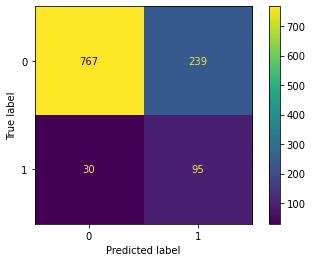

In [144]:
plot_confusion_matrix(logreg,X_test,y_test)

In [107]:
logistic_score_test = logreg.score(X_test, y_test)
print("{:.3f}".format(logistic_score_test*100))
logistic_score_test

76.216


0.762157382847038

In [108]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
solvers = ['lbfgs']

penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

logreg_grid = GridSearchCV(logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
logreg_cv_res = logreg_grid.cv_results_

logreg_mean_fit_time = logreg_cv_res['mean_fit_time'][0]

print("Mean Fit Time: ", logreg_mean_fit_time)

logreg_grid_score_train = logreg_grid.score(X_train, y_train)
logreg_grid_score_test = logreg_grid.score(X_test, y_test)
print("LogReg Train Score:", logreg_grid_score_train)
print("LogReg Test Score:", logreg_grid_score_test)
print(" ")

logreg_acc = (767+95)/(767+239+30+95)*100
logreg_pre = (95)/(239+95)*100
logreg_rec = (95)/(95+30)*100
logreg_spe = (767)/(767+239)*100

print("Accuracy = \t", "{:.10f}".format(logreg_acc))
print("Precision = \t", "{:.10f}".format(logreg_pre))
print("Recall = \t", "{:.10f}".format(logreg_rec))
print("Specificity = \t", "{:.10f}".format(logreg_spe))
print(" ")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Mean Fit Time:  0.1862715721130371
LogReg Train Score: 0.7545722713864307
LogReg Test Score: 0.7559681697612732
 
Accuracy = 	 76.2157382847
Precision = 	 28.4431137725
Recall = 	 76.0000000000
Specificity = 	 76.2425447316
 
Train MSE: 0.2424778761061947
Test MSE: 0.23784261715296198


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [166]:
from sklearn.inspection import permutation_importance
r = permutation_importance(logreg_grid, X_test, y_test, n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

Variable     Score
3  duration  0.072414
6  previous  0.007781
2       day  0.004332
5     pdays  0.003183
1   balance -0.001415
0       age -0.002299
4  campaign -0.003802

**Decision Tree**

In [109]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(X_train, y_train)

In [110]:
dtree_train_preds = dtree.predict(X_train)
dtree_test_preds = dtree.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,dtree_test_preds))


dtree_test_mse = mean_squared_error(dtree_test_preds, y_test)
dtree_train_mse = mean_squared_error(dtree_train_preds, y_train)

print("DTree Train MSE:", dtree_train_mse)
print("DTree Test MSE:", dtree_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1006
           1       0.38      0.33      0.35       125

    accuracy                           0.87      1131
   macro avg       0.65      0.63      0.64      1131
weighted avg       0.86      0.87      0.86      1131

DTree Train MSE: 0.0
DTree Test MSE: 0.134394341290893


In [111]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


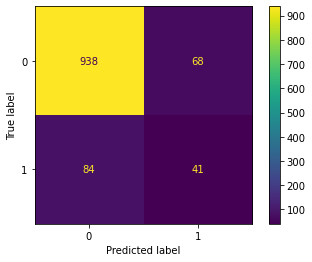

In [112]:
plot_confusion_matrix(dtree,X_test,y_test)

In [113]:
splitter = ['best']

criterion = ['gini']
ccp_alphas = [10, 1.0, 0.1, 0.01]
grid = dict(splitter=splitter,criterion=criterion,ccp_alpha=ccp_alphas)

dtree_grid = GridSearchCV(dtree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
dtree_cv_res = dtree_grid.cv_results_

dtree_mean_fit_time = dtree_cv_res['mean_fit_time'][0]

print("Mean Fit Time: ", dtree_mean_fit_time)

dtree_grid_score_train = dtree_grid.score(X_train, y_train)
dtree_grid_score_test = dtree_grid.score(X_test, y_test)
print("LogReg Train Score:", dtree_grid_score_train)
print("LogReg Test Score:", dtree_grid_score_test)
print(" ")

dtree_acc = (938+41)/(938+68+84+41)*100
dtree_pre = (41)/(41+68)*100
dtree_rec = (41)/(41+84)*100
dtree_spe = (938)/(938+68)*100


print("Accuracy = \t", "{:.10f}".format(dtree_acc))
print("Precision = \t", "{:.10f}".format(dtree_pre))
print("Recall = \t", "{:.10f}".format(dtree_rec))
print("Specificity = \t", "{:.10f}".format(dtree_spe))

print("Train MSE:", dtree_train_mse)
print("Test MSE:", dtree_test_mse)

Mean Fit Time:  0.0736043930053711
LogReg Train Score: 0.8563421828908555
LogReg Test Score: 0.847922192749779
 
Accuracy = 	 86.5605658709
Precision = 	 37.6146788991
Recall = 	 32.8000000000
Specificity = 	 93.2405566600
Train MSE: 0.0
Test MSE: 0.134394341290893


In [167]:
r = permutation_importance(dtree_grid, X_test, y_test, n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

Variable     Score
3  duration  0.076304
5     pdays  0.016357
0       age  0.004156
1   balance  0.000000
2       day  0.000000
4  campaign  0.000000
6  previous  0.000000

**KNearestNeighbor**

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

In [115]:
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,knn_test_preds))


knn_test_mse = mean_squared_error(knn_test_preds, y_test)
knn_train_mse = mean_squared_error(knn_train_preds, y_train)

print("KNN Train MSE:", knn_train_mse)
print("KNN Test MSE:", knn_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1006
           1       0.38      0.22      0.28       125

    accuracy                           0.87      1131
   macro avg       0.64      0.59      0.60      1131
weighted avg       0.85      0.87      0.86      1131

KNN Train MSE: 0.10088495575221239
KNN Test MSE: 0.125552608311229


In [116]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


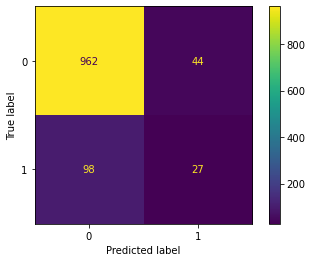

In [117]:
plot_confusion_matrix(knn,X_test,y_test)

In [147]:
leaf_size = [30,20,10]

metric = ['minkowski']
n_neighbors = [10, 5, 3, 2]
grid = dict(leaf_size=leaf_size,metric=metric,n_neighbors=n_neighbors)

knn_grid = GridSearchCV(knn, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
knn_cv_res = knn_grid.cv_results_

knn_mean_fit_time = knn_cv_res['mean_fit_time'][0]
print("Mean Fit Time: ", knn_mean_fit_time)

knn_grid_score_train = knn_grid.score(X_train, y_train)
knn_grid_score_test = knn_grid.score(X_test, y_test)
print("KNN Train Score:", knn_grid_score_train)
print("KNN Test Score:", knn_grid_score_test)
print(" ")

knn_acc = (962+27)/(962+44+98+27)*100
knn_pre = (27)/(27+44)*100
knn_rec = (27)/(27+98)*100
knn_spe = (962)/(962+44)*100


print("Accuracy = \t", "{:.10f}".format(knn_acc))
print("Precision = \t", "{:.10f}".format(knn_pre))
print("Recall = \t", "{:.10f}".format(knn_rec))
print("Specificity = \t", "{:.10f}".format(knn_spe))
print(" ")
print("Train MSE:", knn_train_mse)
print("Test MSE:", knn_test_mse)


Mean Fit Time:  0.023138713836669923
KNN Train Score: 0.8929203539823009
KNN Test Score: 0.8903625110521662
 
Accuracy = 	 87.4447391689
Precision = 	 38.0281690141
Recall = 	 21.6000000000
Specificity = 	 95.6262425447
 
Train MSE: 0.10088495575221239
Test MSE: 0.125552608311229


In [168]:
r = permutation_importance(knn_grid, X_test, y_test, n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

Variable     Score
3  duration  0.025199
5     pdays  0.002741
0       age  0.000000
2       day  0.000000
4  campaign  0.000000
6  previous  0.000000
1   balance -0.003271

**Support Vector Machines**

In [123]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced').fit(X_train, y_train)

In [125]:
svc_train_preds = svc.predict(X_train)
svc_test_preds = svc.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,svc_test_preds))


svc_test_mse = mean_squared_error(svc_test_preds, y_test)
svc_train_mse = mean_squared_error(svc_train_preds, y_train)

print("SVC Train MSE:", svc_train_mse)
print("SVC Test MSE:", svc_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      1006
           1       0.27      0.66      0.39       125

    accuracy                           0.77      1131
   macro avg       0.61      0.72      0.62      1131
weighted avg       0.87      0.77      0.81      1131

SVC Train MSE: 0.2336283185840708
SVC Test MSE: 0.23165340406719717


In [126]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


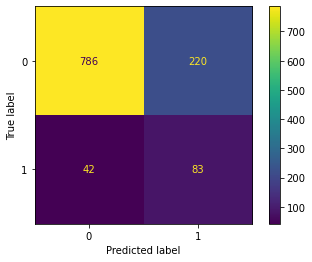

In [127]:
plot_confusion_matrix(svc,X_test,y_test)

In [129]:
kernel = ['rbf']

decision_function_shape = ['ovr']
c_values = [10, 1.0, 0.1, 0.01]
grid = dict(kernel=kernel,decision_function_shape=decision_function_shape,C=c_values)

svc_grid = GridSearchCV(svc, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
svc_cv_res = svc_grid.cv_results_

svc_mean_fit_time = svc_cv_res['mean_fit_time'][0]
print("Mean Fit Time: ", svc_mean_fit_time)

svc_grid_score_train = svc_grid.score(X_train, y_train)
svc_grid_score_test = svc_grid.score(X_test, y_test)
print("LogReg Train Score:", svc_grid_score_train)
print("LogReg Test Score:", svc_grid_score_test)
print(" ")

svc_acc = (786+83)/(786+220+42+83)*100
svc_pre = (83)/(83+220)*100
svc_rec = (83)/(83+42)*100
svc_spe = (786)/(786+220)*100


print("Accuracy = \t", "{:.10f}".format(svc_acc))
print("Precision = \t", "{:.10f}".format(svc_pre))
print("Recall = \t", "{:.10f}".format(svc_rec))
print("Specificity = \t", "{:.10f}".format(svc_spe))
print(" ")
print("SVC Train MSE:", svc_train_mse)
print("SVC Test MSE:", svc_test_mse)

Mean Fit Time:  2.0264134407043457
LogReg Train Score: 0.779646017699115
LogReg Test Score: 0.7904509283819628
 
Accuracy = 	 76.8346595933
Precision = 	 27.3927392739
Recall = 	 66.4000000000
Specificity = 	 78.1312127237
 
SVC Train MSE: 0.2336283185840708
SVC Test MSE: 0.23165340406719717


In [169]:
r = permutation_importance(svc_grid, X_test, y_test, n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

Variable     Score
3  duration  0.085500
5     pdays  0.009107
1   balance  0.001680
0       age  0.000707
2       day  0.000000
6  previous  0.000000
4  campaign -0.000088

#### **Data Table of Values**

In [130]:
val_df = pd.DataFrame(columns = ['model','train score','test score','Mean fit time', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'Train MSE', 'Test MSE'])

In [131]:
val_df.loc[len(val_df.index)] = ['Logistic Regression', logreg_grid_score_train, logreg_grid_score_test, logreg_mean_fit_time, logreg_acc, logreg_pre, logreg_rec, logreg_spe, train_mse, test_mse] 
val_df.loc[len(val_df.index)] = ['Decision Tree', dtree_grid_score_train, dtree_grid_score_test, dtree_mean_fit_time, dtree_acc, dtree_pre, dtree_rec, dtree_spe, dtree_train_mse, dtree_test_mse]
val_df.loc[len(val_df.index)] = ['KNearestNeighbors', knn_grid_score_train, knn_grid_score_test, knn_mean_fit_time, knn_acc, knn_pre, knn_rec, knn_spe, knn_train_mse, knn_test_mse]
val_df.loc[len(val_df.index)] = ['Support Vector Machine', svc_grid_score_train, svc_grid_score_test, svc_mean_fit_time, svc_acc, svc_pre, svc_rec, svc_spe, svc_train_mse, svc_test_mse]


In [132]:
val_df

model  train score  test score  Mean fit time   Accuracy  \
0     Logistic Regression     0.754572    0.755968       0.186272  76.215738   
1           Decision Tree     0.856342    0.847922       0.073604  86.560566   
2       KNearestNeighbors     0.892920    0.890363       0.022940  87.444739   
3  Support Vector Machine     0.779646    0.790451       2.026413  76.834660   

   Precision  Recall  Specificity  Train MSE  Test MSE  
0  28.443114    76.0    76.242545   0.242478  0.237843  
1  37.614679    32.8    93.240557   0.000000  0.134394  
2  38.028169    21.6    95.626243   0.100885  0.125553  
3  27.392739    66.4    78.131213   0.233628  0.231653

### **Report**

The Analysis of the Logistic Regress, Decision Tree Classifier, KNeighborsClassifier and the Support Vector Machines was performed according to the following criteria
1. Imbalance Class Handling
2. Model Training Speed
3. Interpretable Results

Other criteria observed include
1. Accuracy
2. Precision
3. Recall
4. Specificity
5. Mean Squared Error

- **Logistic Regression Classifier**
    - Handles Imbalanced Classes
    - Speed of Training is moderately high at Mean Fit Time of 0.186
    - Test Score performs slightly better than the Train Score
    - Accuracy and Specificity are not too high at 76.2%.
    - Precision is low at 28.4%
    - Recall is high at 76%
    - It appears to not overfit
- **Decision Tree Classifier**
    - Handles Imbalanced Classes
    - Speed of Training is moderately high at Mean Fit Time of 0.07
    - Accuracy and Specificity are very high at 86.5% and 93.2% respectively
    - Train Score performs slightly better than the Test Score
    - Precision is low at 37.6%
    - Recall is low at 32.8%
    - However, the Decision Tree Classifier appears to overfit with Train Score higher than Test Score
- **KNearest Neighbors Classifier**
    - KNN cannot handle Imbalanced classes
    - Speed of Training is very high at Mean Fit Time of 0.02
    - Accuracy and Specificity are very high at 87% and 95% respectively
    - Train Score is slightly higher than the Test Score
    - Precision is low at 38%
    - Recall is low at 21%
    - However, the KNNeighbors Classifier appears to slightly overfit with Train score higher than Test Score
    
- **Support Vector Machine**
    - SVM handles Imbalanced classes
    - Speed of Training is least at Mean Fit Time of 2.02
    - Accuracy and Specificity are very high at 76.8% and 78% respectively
    - Test Score is higher than Train Score
    - Precision is 27.3%
    - Recall is high at 66.%
    - The SVC Classifier appears to not overfit with Test MSE lower than Train MSE

### Selecting Best Model: Logistic Regression
- The Logistic Regression Classifier was selected.
- Support Vector Machine can also be used as a suitable model though the model fit time is higher at 2.0

### Findings

## Solution 1
- The data represents 17 marketing campaigns